In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel("officerWorkHours.xlsx")

# Save the dataframe to a .csv file
df.to_csv("officerWorkHours.csv", index=False)

#######
#######

# Read the CSV file
df = pd.read_csv("officerWorkHours.csv")

# Compute the Overtime to Regular time ratio for each row
df['Overtime_Regulartime_Ratio'] = (df['Pay_Hours'] - df['Hours_Worked']) / df['Hours_Worked']

# Group by 'Emp_Name' and compute the mean of both 'Overtime_Regulartime_Ratio' and 'Pay_Hours'
officerOvertimeRatios = df.groupby('Emp_Name').agg({'Overtime_Regulartime_Ratio': 'mean', 'Pay_Hours': 'sum'}).reset_index()

# Display the resulting table
#print(officerOvertimeRatios)

#######
#######

df = pd.read_csv("officerContactRecords.csv")

# Group by 'contact_officer_name' and count the occurrences
officerContactCounts = df.groupby('contact_officer_name').size().reset_index(name='Field_Contacts')

# Rename the 'contact_officer_name' column to 'Emp_Name'
officerContactCounts.rename(columns={'contact_officer_name': 'Emp_Name'}, inplace=True)

# Display the resulting table
#print(officerContactCounts)

#######
#######

def transform_name_format(name):
    # Split by comma and take the first and second parts (Last Name and First Name)
    last_name, rest_of_name = name.split(",", 1)
    first_name = rest_of_name.split()[0]  # Take the first word after the comma as the First Name
    return f"{last_name.strip()}, {first_name.strip()}"

# Apply the transformation to the Emp_Name column of the officerOvertimeRatios table
officerOvertimeRatios['Emp_Name'] = officerOvertimeRatios['Emp_Name'].apply(transform_name_format)

# Merge the two tables on Emp_Name
merged_df = pd.merge(officerOvertimeRatios, officerContactCounts, on="Emp_Name")

final_table = merged_df.groupby('Emp_Name').agg({'Overtime_Regulartime_Ratio': 'mean', 'Pay_Hours': 'sum', 'Field_Contacts': 'sum'}).reset_index()


# Display the merged table
#print(final_table)

#######
#######

final_table['Contacts_Per_Hour'] = final_table['Field_Contacts'] / final_table['Pay_Hours']

# Display the updated table
print(final_table)

                Emp_Name  Overtime_Regulartime_Ratio  Pay_Hours  \
0    ABRAHAMSON, PATRICK                    0.216960      15200   
1         ABREU, GABRIEL                    1.470068     133200   
2           ACE, RICHARD                    0.246158     148400   
3     ADAMS, CHRISTOPHER                    0.811253      59400   
4        ALLEN, SHERANDA                    0.957596      86700   
..                   ...                         ...        ...   
419       WYMAN, MATTHEW                    0.370848      66800   
420         WYNN, GERARD                    0.626921     243300   
421        YANDLE, BRIAN                    0.608353     282400   
422       ZARNOCH, KEVIN                    1.089802     333200   
423              ZOU, ZI                    1.210618     445300   

     Field_Contacts  Contacts_Per_Hour  
0                22           0.001447  
1                 7           0.000053  
2                 1           0.000007  
3                84           0

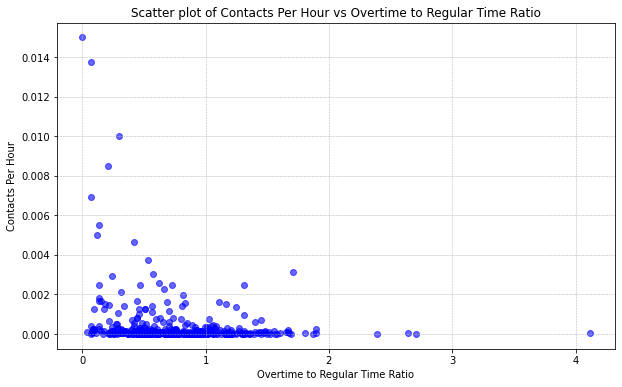

In [11]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(final_table['Overtime_Regulartime_Ratio'], final_table['Contacts_Per_Hour'], color='blue', alpha=0.6)

# Labeling the plot
plt.title('Scatter plot of Contacts Per Hour vs Overtime to Regular Time Ratio')
plt.xlabel('Overtime to Regular Time Ratio')
plt.ylabel('Contacts Per Hour')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

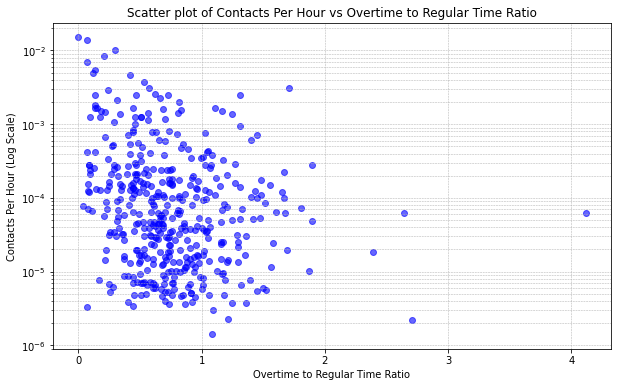

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(final_table['Overtime_Regulartime_Ratio'], final_table['Contacts_Per_Hour'], color='blue', alpha=0.6)

# Labeling the plot
plt.title('Scatter plot of Contacts Per Hour vs Overtime to Regular Time Ratio')
plt.xlabel('Overtime to Regular Time Ratio')
plt.ylabel('Contacts Per Hour (Log Scale)')
plt.yscale('log')  # This sets the y-axis to a logarithmic scale
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()